# Part II:  Identify ranges for each dataset

#### The output dataset from this study:  `'../../data/normalized_annotatted_all_2023-04-07_13.21.00.0000.tsv'`

1. Incorporate Annotation Data
1. Evaluate model (in)consistency
1. Normalize model polarity scores
1. Visualize distributions in boxplots and histograms

In [1]:
import os
import pandas as pd
from datetime import datetime

## Annotated Data

In [7]:
%%sh

# combined annotations?
ls ../../data/combined_annot*

../../data/combined_annotations_2023-04-02_20.13.51.914670.tsv


In [10]:
norm_df = pd.read_csv('../../data/combined_model_data_all_norm_2023-04-02_20.13.51.914670.tsv', sep='\t')
annotations_df = pd.read_csv('../../data/combined_annotations_2023-04-02_20.13.51.914670.tsv', sep='\t')
print(norm_df.columns)
print(annotations_df.columns)


Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'created_at',
       'clean_text', 'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores'],
      dtype='object')
Index(['Unnamed: 0', 'Unnamed: 0.1.1', 'conversation_id', 'lang',
       'reply_settings', 'created_at', 'clean_text', 't

In [112]:
df = pd.merge(left=norm_df, right=annotations_df[['conversation_id', 'our_label', 'annotator']], how='left', on='conversation_id', suffixes=('', '_annot'))
print(df.shape, norm_df.shape, annotations_df.shape)
df.head()

(30611, 36) (30611, 34) (300, 24)


,Unnamed: 0,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,...,AFINN_sentiments,SentiWordNet_scores,normalized_textblob_Polarity,normalized_textblob_Subjectivity,normalized_vader_Polarity,normalized_vader_Subjectivity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator
0,0,1633954063934009344,en,everyone,2023-03-09 22:13:00+00:00,rt infantry bucky lucky chrisrocklive worse th...,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",1633954063934009344,...,negative,0.250,0.480556,0.527778,0.176602,0.640625,0.448980,0.444444,NaN,NaN
1,1,1633954058212876288,en,everyone,2023-03-09 22:12:59+00:00,rt ofakindnocap chris rock cheated never perso...,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",1633954058212876288,...,negative,-0.625,0.500000,0.000000,0.217017,0.529018,0.367347,0.333333,NaN,NaN
2,2,1633951267423768576,en,everyone,2023-03-09 22:01:54+00:00,rt ofakindnocap chris rock cheated never perso...,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",1633951267423768576,...,negative,-0.625,0.500000,0.000000,0.217017,0.529018,0.367347,0.333333,NaN,NaN
3,3,1633950853626318848,en,everyone,2023-03-09 22:00:15+00:00,rt rolandsmartin working watching chrisrock ne...,RT @rolandsmartin: Working out and watching th...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632825595473149...",1633950853626318848,...,neutral,0.000,0.623377,0.535714,0.702710,0.191964,0.489796,0.412698,NaN,NaN
4,4,1633950824664645632,en,everyone,2023-03-09 22:00:08+00:00,rt rolandsmartin workout done comment chrisroc...,RT @rolandsmartin: Workout done. I’ll have a f...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632833853021728...",1633950824664645632,...,neutral,0.000,0.623377,0.535714,0.702710,0.219866,0.489796,0.412698,NaN,NaN


#### Warning
Note that the following file has incorrect normalized sentiments for AFINN and SentiWordNet; will rename it with _obsolete and creating a new file below with adjusted normalizations.

In [15]:
# from datetime import datetime
# timestamp = str(datetime.now()).replace(' ', '_').replace(':', '.')
# output_filename = f'../../data/normalized_annotated_all_{timestamp}.tsv'
# df.to_csv(output_filename, sep='\t')
# print('wrote', output_filename)

wrote ../../data/normalized_annotated_all_2023-04-07_07.55.28.945037.tsv


In [20]:
annot_df = df.loc[~df['annotator'].isna()]
print(annot_df.columns)
annot_df[['conversation_id', 'text',
          'normalized_textblob_Polarity',
          'normalized_vader_Polarity',
          'normalized_AFINN_scores',
          'normalized_SentiWordNet_scores',
          'our_label', 'annotator']].head()

Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'created_at',
       'clean_text', 'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator'],
      dtype='object')


,conversation_id,text,normalized_textblob_Polarity,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator
185,1633724515212742656,RT @netflix: #ChrisRockLive TONIGHT at 10pm ET...,0.623918,0.781464,0.469388,0.412698,neutral,anu
285,1633637250419367936,YOU MUST READ ‼️‼️‼️‼️\nIMPORTANT NOTICE DIFF...,0.583333,0.601621,0.530612,0.539683,neutral,melissa
359,1633586187700150272,RT @NetflixIsAJoke: Shout out to @ohsnapjbsmoo...,0.500000,0.702710,0.489796,0.412698,positive,anu
416,1633553321246990336,RT @sagesurge: Marlon Wayans roasting Chris Ro...,0.500000,0.576703,0.489796,0.412698,neutral,anu
638,1633429724973223936,RT @TheWantonWench: When you say “I need a bre...,0.700000,0.858546,0.571429,0.492063,positive,anu


In [33]:
def print_tweet_id(conversation_id):
    print(annot_df.loc[annot_df['conversation_id'] == conversation_id]['text'].values[0])

In [34]:
#annot_df.loc[annot_df['conversation_id'] == 1633586187700150272]['text'].values
print_tweet_id(1633586187700150272)

RT @NetflixIsAJoke: Shout out to @ohsnapjbsmoove for flying out to LA for the #ChrisRockLive watch party! https://t.co/B4pIns8rIU


# textblob

In [36]:
tb_df = df[['conversation_id', 'normalized_textblob_Polarity', 'our_label']].loc[~df['our_label'].isna()]
tb_df.sort_values(by='normalized_textblob_Polarity', ascending=True).head(50)

,conversation_id,normalized_textblob_Polarity,our_label
17435,1633675210929971200,0.000000,positive
11811,1633661305801326592,0.000000,negative
27382,1633876161553137664,0.200000,negative
19801,1633655401383178240,0.225000,negative
17425,1633675220648357888,0.250000,negative
20869,1633669043772178432,0.250000,neutral
19378,1633671671902093312,0.250000,neutral
9972,1633945378797289472,0.250000,neutral
25326,1633209504631513088,0.250000,neutral
9153,1633951892865728512,0.300000,neutral


### inspect individual tweets with disagreement

Note:  this tweet seems to be "positive" sentiment from the perspective of the author, even if 
in much of the West there would be disagreement on this point of view.

Would be worthwhile investigating how "westernized" these models are.


In [37]:
# Note:  this tweet seems to be "positive" sentiment from the perspective of the author, even if 
# in much of the West there would be disagreement on this point of view.

# Would be worthwhile investigating how "westernized" these models are.

print_tweet_id(1633675210929971200)

RT @Robin_Hoodsband: Russia is on the road to victory against evil NATO and the Nazi's https://t.co/OiFtdg5U6F


The following tweet is annotated as _positive_, however, this may be more of a _neutral_ tweet.  Again (in a different way) it is not clear how much the point of view (perspective wrt Westernization?) impacts model performance.

In [38]:
print_tweet_id(1633391906733342720)

@GMB @susannareid100 @SuellaBraverman Contrary to popular opinion, you don't have to give up your nation, you statehood and become a dumping ground for an endless stream of people who will hate and detest you until you emigrate or die out


Tweet 1633668936477601792 seems like a positive tweet from a Western perspective, and it gets a .45 from textblob.

In [39]:
print_tweet_id(1633668936477601792)

RT @NonaMamulashvi: No matter how hard Russia tries to destroy our future, Georgia’s future is European and we will keep fighting for it! #…


### inspect the other end of scores

In [40]:
tb_df.sort_values(by='normalized_textblob_Polarity', ascending=True).tail(50)

,conversation_id,normalized_textblob_Polarity,our_label
14533,1633604224843120640,0.625000,negative
19097,1633444762584850432,0.625000,neutral
16555,1633676619981127680,0.625000,neutral
12148,1633528540485283840,0.625000,negative
25616,1633108903159382016,0.625000,neutral
25400,1633189244003917824,0.625000,neutral
30202,1633753421554565120,0.633333,neutral
7821,1633963477877358592,0.639394,neutral
13603,1633663243796226048,0.641667,neutral
21251,1633935526578249728,0.642045,positive


In [41]:
# histogram of textblob vs our annotations

array([[<AxesSubplot:title={'center':'normalized_textblob_Polarity'}>]],
      dtype=object)

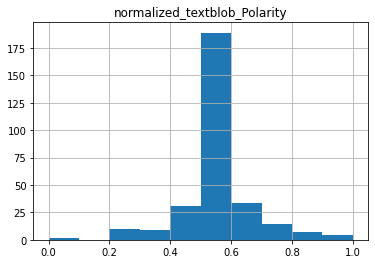

In [43]:
tb_df[['normalized_textblob_Polarity', 'our_label']].hist()

<Figure size 1152x720 with 0 Axes>

<Figure size 864x288 with 0 Axes>

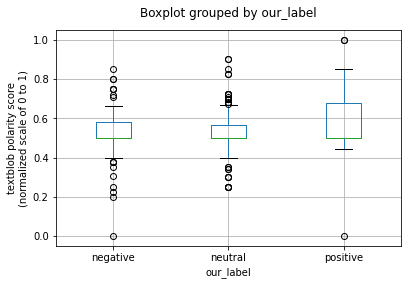

<Figure size 864x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.figure().set_figwidth(12)

tb_df[['our_label', 'normalized_textblob_Polarity']].boxplot(column='normalized_textblob_Polarity', by='our_label')
# plt.title('\nTextblob sentiment scores of our annotations')
plt.title('')
plt.ylabel('textblob polarity score\n(normalized scale of 0 to 1)')
# plt.figsize(10,10)
# figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure().set_figwidth(12)

plt.show()


In [65]:
# how many of our negatives are <= 0.5 textblob?
df.loc[(df['our_label'] == 'negative') & (df['normalized_textblob_Polarity'] <= 0.5)].shape

(57, 36)

In [67]:
# total negative annotations
df.loc[(df['our_label'] == 'negative')].shape

(93, 36)

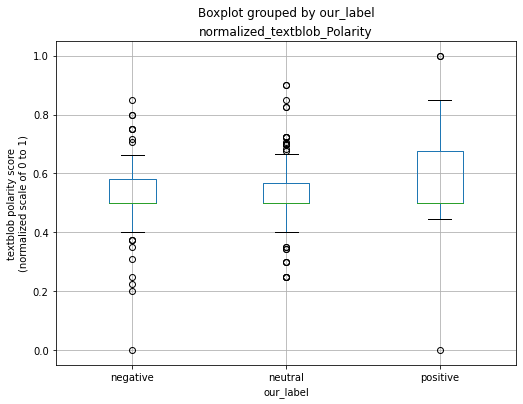

In [77]:
# I like the boxplots. Can I make all 4 images?
#plt.figure(figsize=(16,10))
# plt.figure().set_figwidth(12)

tb_df[['our_label', 'normalized_textblob_Polarity']].boxplot(column='normalized_textblob_Polarity', 
                                                             by='our_label',
                                                             figsize=(8,6),
                                                             
                                                            )
# plt.title('\nTextblob sentiment scores of our annotations')
# plt.title('')
plt.ylabel('textblob polarity score\n(normalized scale of 0 to 1)')
plt.show()


In [113]:
df.columns

Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'created_at',
       'clean_text', 'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator'],
      dtype='object')

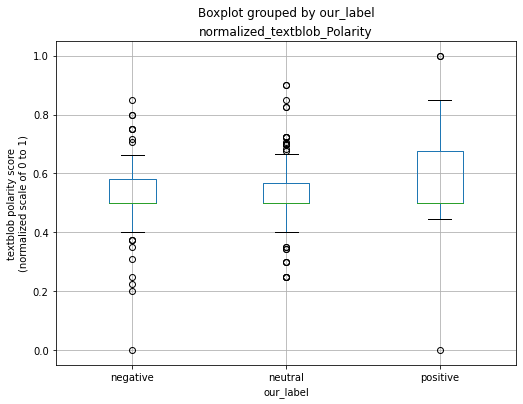

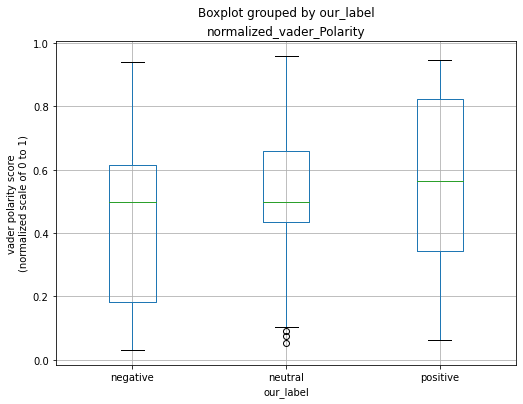

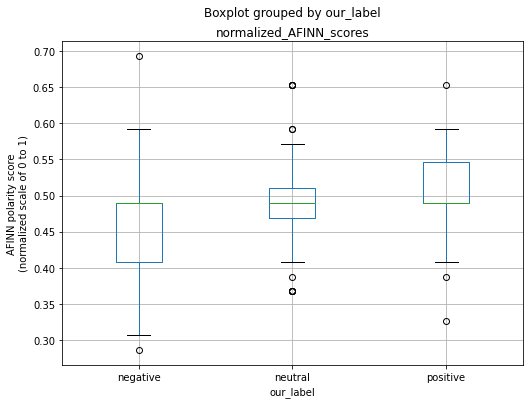

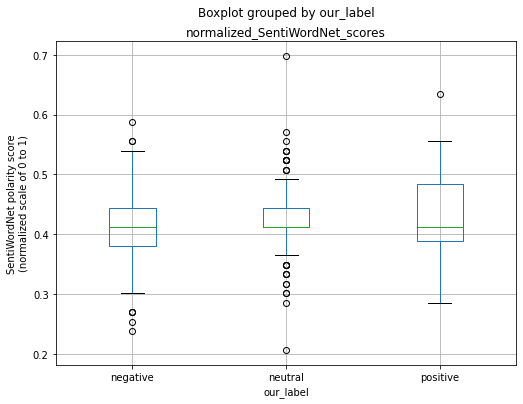

In [84]:
df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6))
plt.ylabel('textblob polarity score\n(normalized scale of 0 to 1)')
plt.show()

df.boxplot(column='normalized_vader_Polarity', by='our_label', figsize=(8,6))
plt.ylabel('vader polarity score\n(normalized scale of 0 to 1)')
plt.show()

df.boxplot(column='normalized_AFINN_scores', by='our_label', figsize=(8,6))
plt.ylabel('AFINN polarity score\n(normalized scale of 0 to 1)')
plt.show()

df.boxplot(column='normalized_SentiWordNet_scores', by='our_label', figsize=(8,6))
plt.ylabel('SentiWordNet polarity score\n(normalized scale of 0 to 1)')
plt.show()

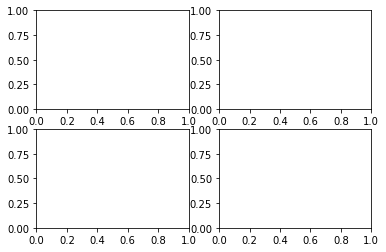

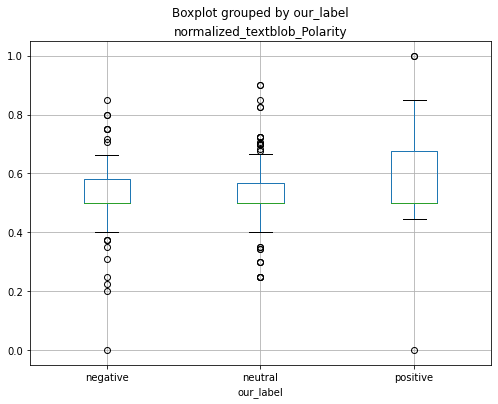

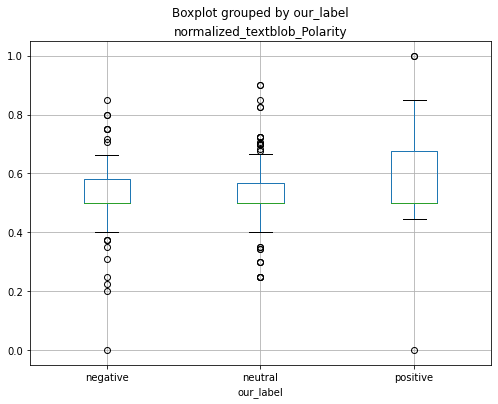

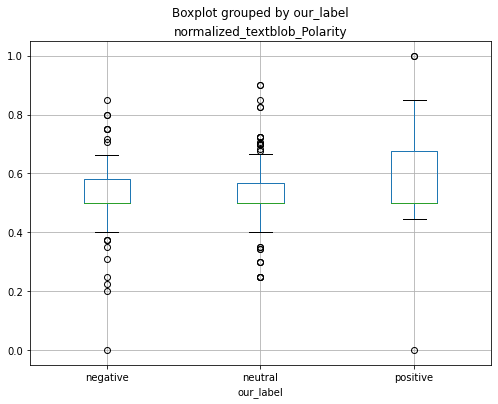

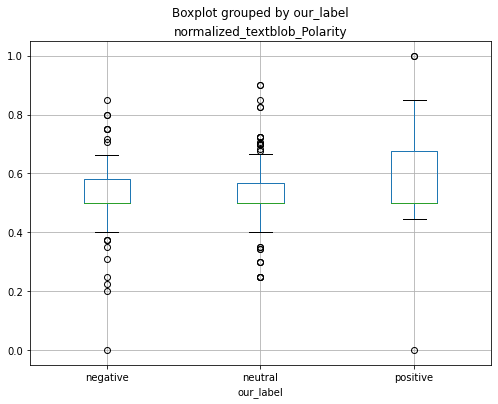

In [99]:
# df.boxplot(column='normalized_vader_Polarity', by='our_label', figsize=(8,6))
# plt.ylabel('vader polarity score\n(normalized scale of 0 to 1)')
# plt.show()

# plot1 = df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6),
#                    ylabel='textblob polarity score\n(normalized scale of 0 to 1)')
# plot1.show()



# df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6), )
# plt.ylabel('Polarity Score (scale 0 to 1)')
#ax[0,0] = df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6), )
#plt.ylabel('Polarity Score (scale 0 to 1)')

# df.boxplot(column='normalized_vader_Polarity', by='our_label', figsize=(8,6))
# plt.ylabel('vader polarity score\n(normalized scale of 0 to 1)')
# plt.show()

# df.boxplot(column='normalized_AFINN_scores', by='our_label', figsize=(8,6))
# plt.ylabel('AFINN polarity score\n(normalized scale of 0 to 1)')
# plt.show()

# df.boxplot(column='normalized_SentiWordNet_scores', by='our_label', figsize=(8,6))
# plt.ylabel('SentiWordNet polarity score\n(normalized scale of 0 to 1)')
# plt.show()

# fig, ax = plt.subplots(nrows=2, ncols=2)

# for row in ax:
#     for col in row:
#         col.plot(x, y)

# plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0] = df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6), )
ax[1,0] = df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6), )
ax[0,1] = df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6), )
ax[1,1] = df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6), )
plt.show()

In [125]:
# df.boxplot(column='normalized_textblob_Polarity', by='our_label', figsize=(8,6))
# df.boxplot(column='normalized_vader_Polarity', by='our_label', figsize=(8,6))
# df.boxplot(column='normalized_AFINN_scores', by='our_label', figsize=(8,6))
# df.boxplot(column='normalized_SentiWordNet_scores', by='our_label', figsize=(8,6))

all_scores = ['normalized_textblob_Polarity','normalized_vader_Polarity','normalized_AFINN_scores','normalized_SentiWordNet_scores']
print(all_scores)

all_scores_and_annot = ['normalized_textblob_Polarity','normalized_vader_Polarity','normalized_AFINN_scores','normalized_SentiWordNet_scores', 'our_label']
print(all_scores_and_annot)


['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores']
['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores', 'our_label']


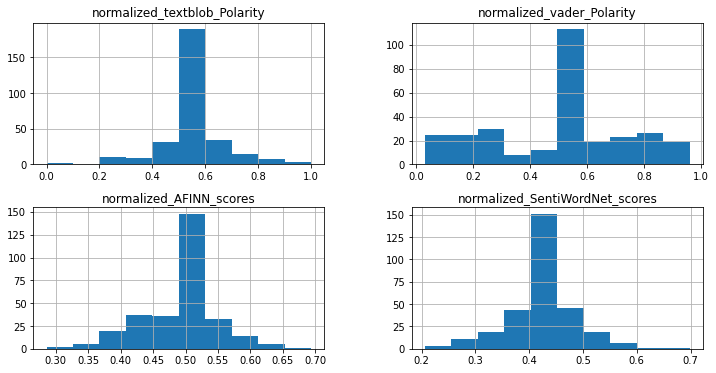

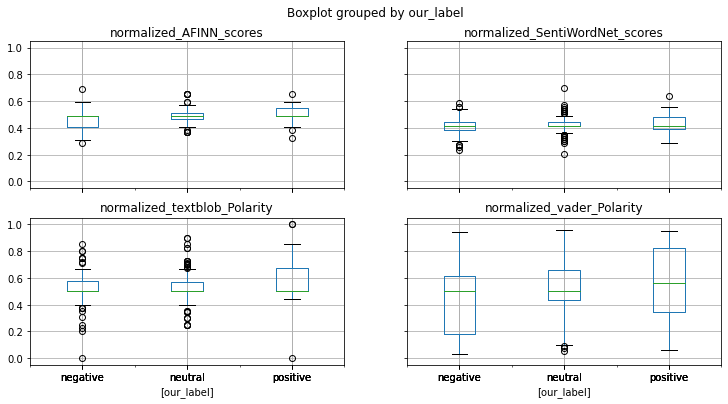

In [127]:
#df = pd.DataFrame(data=np.random.random(size=(50, 6)), columns=[i for i in string.ascii_lowercase[:6]])
plot_df = annot_df[all_scores]
plot_df.hist(layout=(2,2), figsize=(12,6))
plt.show()

plot_df = annot_df[all_scores_and_annot]
plot_df.boxplot(layout=(2,2), figsize=(12,6), by='our_label')
plt.show()

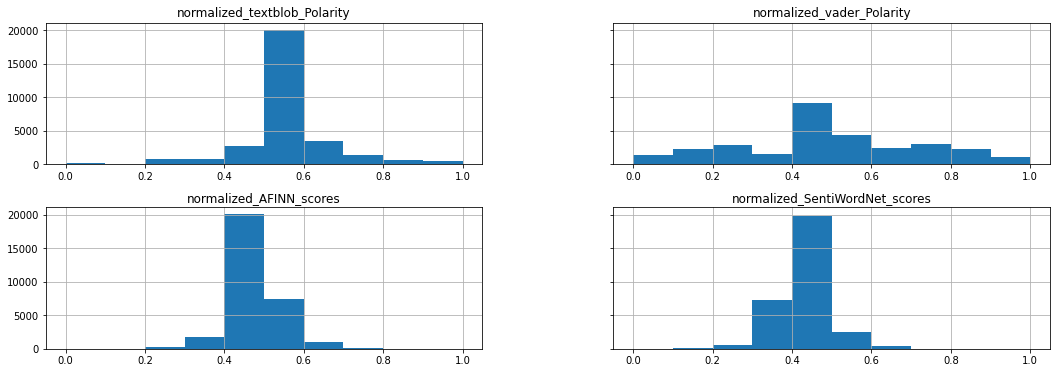

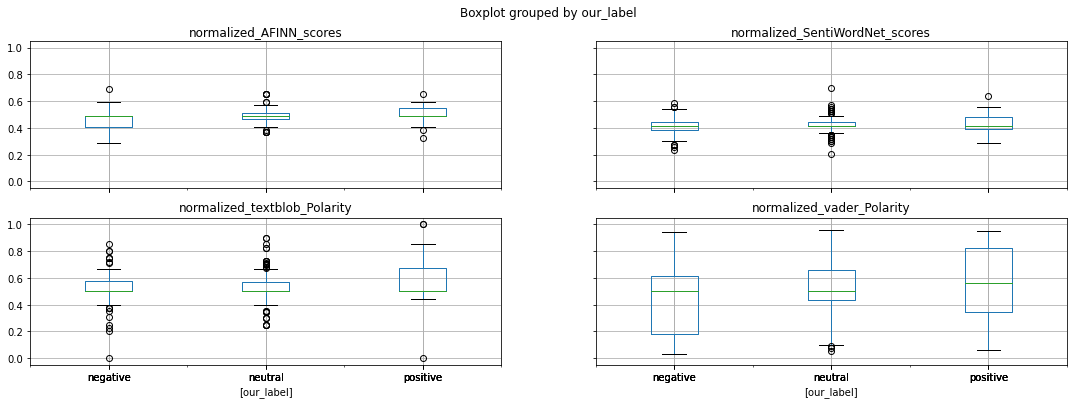

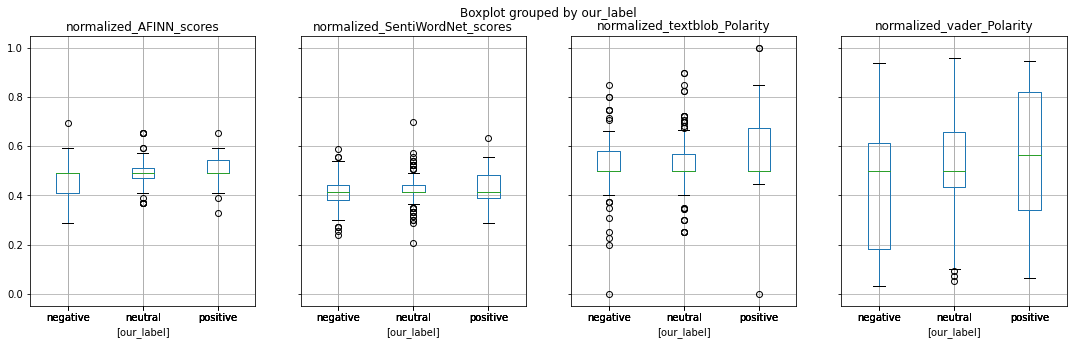

In [340]:
plot_df = df[all_scores]
plot_df.hist(layout=(2,2), figsize=(18,6), sharey=True)
plt.show()

plot_df = annot_df[all_scores_and_annot]
plot_df.boxplot(layout=(2,2), figsize=(18,6), by='our_label')
plt.show()

plot_df = annot_df[all_scores_and_annot]
plot_df.boxplot(layout=(1,4), figsize=(18,5), by='our_label')
plt.show()

# Fix Normalization

- Our normalization for AFINN and SentiWordNet is wrong.  Should span 0 to 1 but these do not.
- Fixing:
- divide by range of scores to center at 0 with new range of 1
- shift by +.5 to center at .5

In [159]:
print(df.shape, df.columns)
print(annot_df.shape, annot_df.columns)


(30611, 36) Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'created_at',
       'clean_text', 'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator'],
      dtype='object')
(300, 36) Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'create

### AFINN

In [162]:
print(df['normalized_AFINN_scores'].describe())
#(df['AFINN_scores']/20+.5).describe()
#df['normalized_AFINN_scores_old_wrong'] = df['normalized_AFINN_scores']
df['normalized_AFINN_scores'] = df['AFINN_scores']/20+.5
# (x - min)/(max - min)
afinn_min = df['normalized_AFINN_scores'].min()
afinn_max = df['normalized_AFINN_scores'].max()
df['normalized_AFINN_scores'] = (df['normalized_AFINN_scores'] - afinn_min)/(afinn_max - afinn_min)
print(df['normalized_AFINN_scores'].describe())

count    30611.000000
mean         0.485524
std          0.060486
min          0.000000
25%          0.448980
50%          0.489796
75%          0.510204
max          1.000000
Name: normalized_AFINN_scores, dtype: float64
count    30611.000000
mean         0.485524
std          0.060486
min          0.000000
25%          0.448980
50%          0.489796
75%          0.510204
max          1.000000
Name: normalized_AFINN_scores, dtype: float64


## SentiWordNet

In [163]:
print(df['normalized_SentiWordNet_scores'].describe())
swn_min = df['SentiWordNet_scores'].min()
swn_max = df['SentiWordNet_scores'].max()
#((df['SentiWordNet_scores']-swn_min)/(swn_max-swn_min)).describe()  # looks good, ranges 0 to 1.0
df['normalized_SentiWordNet_scores_old_wrong'] = df['normalized_SentiWordNet_scores']
df['normalized_SentiWordNet_scores'] = (df['SentiWordNet_scores']-swn_min)/(swn_max-swn_min)
print(df['normalized_SentiWordNet_scores'].describe())

count    30611.000000
mean         0.422334
std          0.061745
min          0.000000
25%          0.396825
50%          0.412698
75%          0.444444
max          1.000000
Name: normalized_SentiWordNet_scores, dtype: float64
count    30611.000000
mean         0.422334
std          0.061745
min          0.000000
25%          0.396825
50%          0.412698
75%          0.444444
max          1.000000
Name: normalized_SentiWordNet_scores, dtype: float64


### Save normalized file

In [168]:
df.drop('normalized_SentiWordNet_scores_old_wrong', axis=1, inplace=True)
df.columns

Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'created_at',
       'clean_text', 'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator'],
      dtype='object')

In [169]:
#timestamp = str(datetime.now()).replace(' ', '_').replace(':', '.')  2023-04-07_12.43.49.255973
output_filename = f'../../data/normalized_annotated_all_{timestamp}.tsv'
df.to_csv(output_filename, sep='\t')
print('wrote', output_filename)

wrote ../../data/normalized_annotated_all_2023-04-07_12.43.49.255973.tsv


In [174]:
print(df.shape)
df.sample(n=10)

(30611, 36)


,Unnamed: 0,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,...,AFINN_sentiments,SentiWordNet_scores,normalized_textblob_Polarity,normalized_textblob_Subjectivity,normalized_vader_Polarity,normalized_vader_Subjectivity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator
8618,8736,1633955914645471232,en,everyone,2023-03-09 22:20:22+00:00,rt alicekeeler asked chatgpt research article ...,RT @alicekeeler: I asked ChatGPT for some rese...,116278538,"[{'type': 'retweeted', 'id': '1633819674562494...",1633955914645471232,...,positive,0.875,0.900000,1.000000,0.871461,0.380580,0.591837,0.523810,NaN,NaN
19593,20450,1633671340539486208,en,everyone,2023-03-09 03:29:34+00:00,rt die trying everyone know china loyal russia...,RT @Die__Trying_: Everyone knows China is loya...,31417953,"[{'type': 'retweeted', 'id': '1633231047432257...",1633671340539486208,...,negative,0.625,0.666667,0.833333,0.073639,0.678571,0.469388,0.492063,NaN,NaN
17579,18257,1633674980134211584,en,everyone,2023-03-09 03:44:02+00:00,rt cbcnews canada top olympian publicly demand...,RT @CBCNews: Some of Canada's top Olympians ar...,1554591988707631104,"[{'type': 'retweeted', 'id': '1633671480507760...",1633674980134211584,...,positive,-0.250,0.625000,0.283333,0.486098,0.263393,0.510204,0.380952,NaN,NaN
23996,25250,1633587711515717632,en,everyone,2023-03-08 21:57:15+00:00,rt tomfitton leftist belittle police eve senat...,RT @TomFitton: Leftists belittle police on eve...,1587477096560984064,"[{'type': 'retweeted', 'id': '1633587310095745...",1633587711515717632,...,negative,-0.125,0.512500,0.475000,0.119017,0.319196,0.387755,0.396825,negative,melissa
17461,18126,1633675164440469504,en,everyone,2023-03-09 03:44:46+00:00,rt nikamelkozerova viktor troshki fedir shando...,RT @NikaMelkozerova: Viktor Troshki and Fedir ...,60231171,"[{'type': 'retweeted', 'id': '1633480115299418...",1633675164440469504,...,positive,0.000,0.800000,0.750000,0.601621,0.363839,0.510204,0.412698,NaN,NaN
29374,30967,1633874493243551744,en,everyone,2023-03-09 16:56:49+00:00,security service ukraine dismissed accusation ...,Security Service of Ukraine dismissed accusati...,3056365913,NaN,1633874493243551744,...,negative,0.000,0.500000,0.000000,0.249025,0.520089,0.367347,0.412698,NaN,NaN
11535,11761,1633667295338979328,en,everyone,2023-03-09 03:13:29+00:00,rt therickwilson captive maga madhouse created...,RT @TheRickWilson: They're captives of in the ...,1573679580,"[{'type': 'retweeted', 'id': '1633530595572842...",1633667295338979328,...,neutral,-0.250,0.433333,0.733333,0.625779,0.186384,0.489796,0.380952,NaN,NaN
6657,6698,1633975218082308096,en,everyone,2023-03-09 23:37:04+00:00,chatgpt available azure openai service azure b...,ChatGPT is now available in Azure OpenAI Servi...,29709005,NaN,1633975218082308096,...,neutral,0.375,0.700000,0.400000,0.499164,0.000000,0.489796,0.460317,NaN,NaN
13871,14269,1633661880383275008,en,everyone,2023-03-09 02:51:58+00:00,rt tomfitton obama knew clinton knew biden kne...,RT @TomFitton: Obama knew. Clinton knew. Biden...,1351302331548258304,"[{'type': 'retweeted', 'id': '1633625411845345...",1633661880383275008,...,neutral,0.000,0.500000,0.000000,0.499164,0.000000,0.489796,0.412698,neutral,sarik
6922,6970,1633972576962719744,en,everyone,2023-03-09 23:26:34+00:00,rt mechmediacom domain sale http co c bxfafk l...,RT @mechmediacom: Domain for Sale:\n\nhttps://...,1915677355,"[{'type': 'retweeted', 'id': '1633969373315493...",1633972576962719744,...,neutral,0.000,0.500000,0.000000,0.731527,0.159598,0.489796,0.412698,NaN,NaN


In [175]:
annot_df = df.loc[~df['our_label'].isna()]
annot_df.head()

,Unnamed: 0,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,...,AFINN_sentiments,SentiWordNet_scores,normalized_textblob_Polarity,normalized_textblob_Subjectivity,normalized_vader_Polarity,normalized_vader_Subjectivity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator
185,186,1633724515212742656,en,everyone,2023-03-09 07:00:52+00:00,rt netflix chrisrocklive tonight pm et pm pt m...,RT @netflix: #ChrisRockLive TONIGHT at 10pm ET...,2348520354,"[{'type': 'retweeted', 'id': '1631421624359739...",1633724515212742656,...,negative,0.000,0.623918,0.468254,0.781464,0.364955,0.469388,0.412698,neutral,anu
285,286,1633637250419367936,en,everyone,2023-03-09 01:14:06+00:00,must read important notice different fixed mat...,YOU MUST READ ‼️‼️‼️‼️\nIMPORTANT NOTICE DIFF...,1631666639862132736,NaN,1633637250419367936,...,positive,1.000,0.583333,0.600000,0.601621,0.107143,0.530612,0.539683,neutral,melissa
359,360,1633586187700150272,en,everyone,2023-03-08 21:51:12+00:00,rt netflixisajoke shout ohsnapjbsmoove flying ...,RT @NetflixIsAJoke: Shout out to @ohsnapjbsmoo...,852279096310546432,"[{'type': 'retweeted', 'id': '1633573306157916...",1633586187700150272,...,neutral,0.000,0.500000,0.000000,0.702710,0.191964,0.489796,0.412698,positive,anu
416,417,1633553321246990336,en,everyone,2023-03-08 19:40:36+00:00,rt sagesurge marlon wayans roasting chris rock...,RT @sagesurge: Marlon Wayans roasting Chris Ro...,1620178857767698432,"[{'type': 'retweeted', 'id': '1632525319973289...",1633553321246990336,...,neutral,0.000,0.500000,0.000000,0.576703,0.131696,0.489796,0.412698,neutral,anu
638,643,1633429724973223936,en,everyone,2023-03-08 11:29:28+00:00,rt thewantonwench say need break harry meghan ...,RT @TheWantonWench: When you say “I need a bre...,1362888253242830848,"[{'type': 'retweeted', 'id': '1632893264494772...",1633429724973223936,...,positive,0.625,0.700000,0.450000,0.858546,0.414062,0.571429,0.492063,positive,anu


### Re-plotting with corrected normalization

- This looks better!  
- Save new dataset with corrected normalizations.

In [179]:
print(all_scores)
print(all_scores_and_annot)

['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores']
['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores', 'our_label']


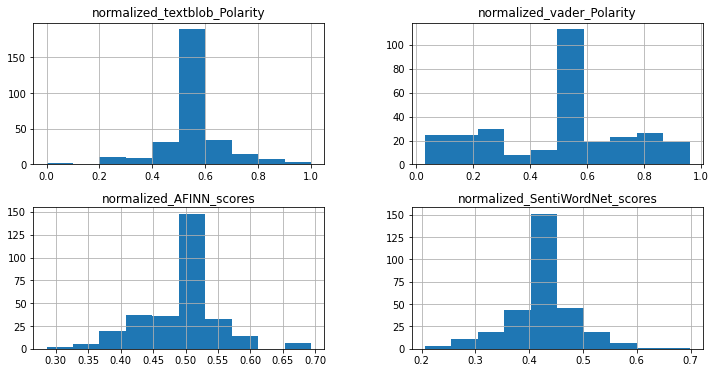

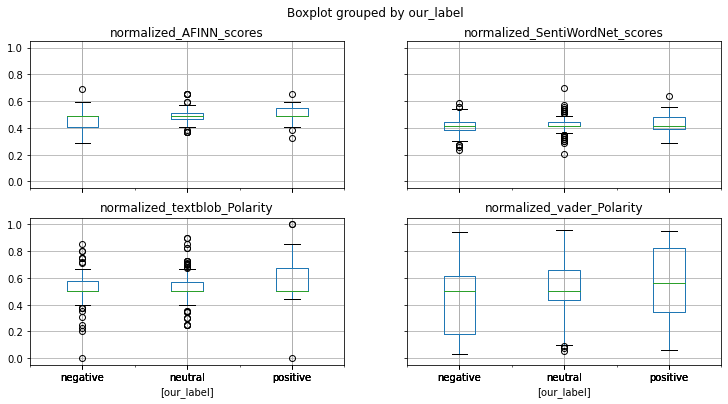

In [182]:
#df = pd.DataFrame(data=np.random.random(size=(50, 6)), columns=[i for i in string.ascii_lowercase[:6]])
plot_df = annot_df[all_scores]
plot_df.hist(layout=(2,2), figsize=(12,6))
plt.show()

plot_df = annot_df[all_scores_and_annot]
plot_df.boxplot(layout=(2,2), figsize=(12,6), by='our_label')
plt.show()

In [177]:
print(annot_df.columns)
annot_df.head()

Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'created_at',
       'clean_text', 'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator'],
      dtype='object')


,Unnamed: 0,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,...,AFINN_sentiments,SentiWordNet_scores,normalized_textblob_Polarity,normalized_textblob_Subjectivity,normalized_vader_Polarity,normalized_vader_Subjectivity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator
185,186,1633724515212742656,en,everyone,2023-03-09 07:00:52+00:00,rt netflix chrisrocklive tonight pm et pm pt m...,RT @netflix: #ChrisRockLive TONIGHT at 10pm ET...,2348520354,"[{'type': 'retweeted', 'id': '1631421624359739...",1633724515212742656,...,negative,0.000,0.623918,0.468254,0.781464,0.364955,0.469388,0.412698,neutral,anu
285,286,1633637250419367936,en,everyone,2023-03-09 01:14:06+00:00,must read important notice different fixed mat...,YOU MUST READ ‼️‼️‼️‼️\nIMPORTANT NOTICE DIFF...,1631666639862132736,NaN,1633637250419367936,...,positive,1.000,0.583333,0.600000,0.601621,0.107143,0.530612,0.539683,neutral,melissa
359,360,1633586187700150272,en,everyone,2023-03-08 21:51:12+00:00,rt netflixisajoke shout ohsnapjbsmoove flying ...,RT @NetflixIsAJoke: Shout out to @ohsnapjbsmoo...,852279096310546432,"[{'type': 'retweeted', 'id': '1633573306157916...",1633586187700150272,...,neutral,0.000,0.500000,0.000000,0.702710,0.191964,0.489796,0.412698,positive,anu
416,417,1633553321246990336,en,everyone,2023-03-08 19:40:36+00:00,rt sagesurge marlon wayans roasting chris rock...,RT @sagesurge: Marlon Wayans roasting Chris Ro...,1620178857767698432,"[{'type': 'retweeted', 'id': '1632525319973289...",1633553321246990336,...,neutral,0.000,0.500000,0.000000,0.576703,0.131696,0.489796,0.412698,neutral,anu
638,643,1633429724973223936,en,everyone,2023-03-08 11:29:28+00:00,rt thewantonwench say need break harry meghan ...,RT @TheWantonWench: When you say “I need a bre...,1362888253242830848,"[{'type': 'retweeted', 'id': '1632893264494772...",1633429724973223936,...,positive,0.625,0.700000,0.450000,0.858546,0.414062,0.571429,0.492063,positive,anu


## Determine model ranges

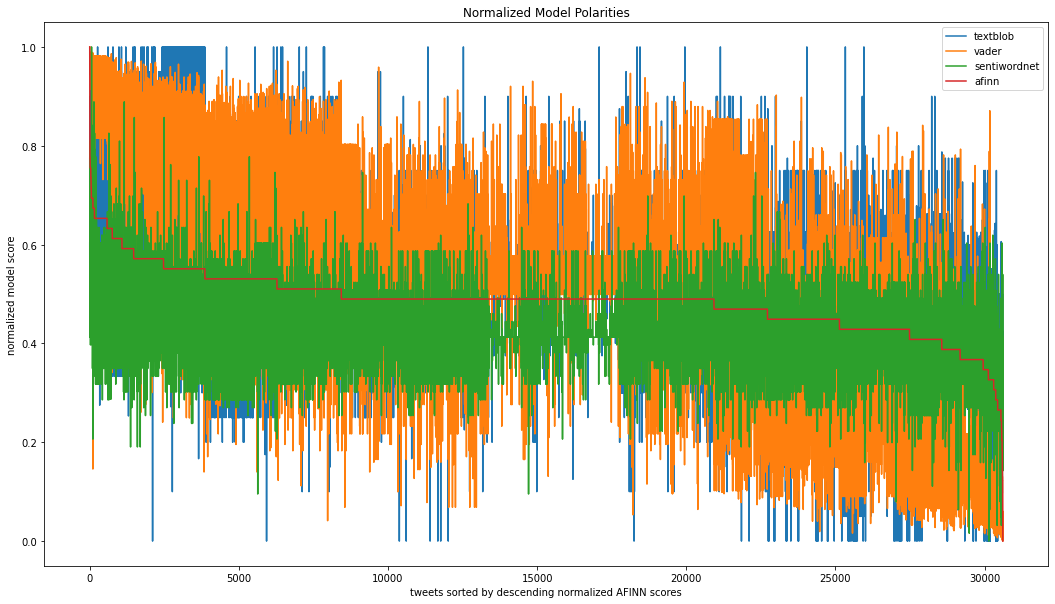

In [215]:

x = range(df.shape[0])

textblob = df[all_scores].sort_values(ascending=False, by='normalized_AFINN_scores')['normalized_textblob_Polarity']
vader = df[all_scores].sort_values(ascending=False, by='normalized_AFINN_scores')['normalized_vader_Polarity']
afinn = df[all_scores].sort_values(ascending=False, by='normalized_AFINN_scores')['normalized_AFINN_scores']
sentiwordnet = df[all_scores].sort_values(ascending=False, by='normalized_AFINN_scores')['normalized_SentiWordNet_scores']

plt.figure(figsize=(18,10))
plt.plot(x, textblob)
plt.plot(x, vader)
plt.plot(x, sentiwordnet)
plt.plot(x, afinn)

plt.gca().legend(('textblob','vader','sentiwordnet', 'afinn'))
plt.xlabel('tweets sorted by descending normalized AFINN scores')
plt.ylabel('normalized model score')
plt.title('Normalized Model Polarities')
plt.show()


In [220]:
# Plot annotations numerically against the model scores
annot_df['our_nums'] = 0
annot_df.loc[annot_df['our_label'] == 'positive', 'our_nums'] = 1
annot_df.loc[annot_df['our_label'] == 'neutral', 'our_nums'] = .5
annot_df.loc[annot_df['our_label'] == 'negative', 'our_nums'] = 0
annot_df.head(30)

<ipython-input-220-b08f8d99e2db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annot_df['our_nums'] = 0
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Unnamed: 0,conversation_id,lang,reply_settings,created_at,clean_text,text,author_id,referenced_tweets,id,...,SentiWordNet_scores,normalized_textblob_Polarity,normalized_textblob_Subjectivity,normalized_vader_Polarity,normalized_vader_Subjectivity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label,annotator,our_nums
185,186,1633724515212742656,en,everyone,2023-03-09 07:00:52+00:00,rt netflix chrisrocklive tonight pm et pm pt m...,RT @netflix: #ChrisRockLive TONIGHT at 10pm ET...,2348520354,"[{'type': 'retweeted', 'id': '1631421624359739...",1633724515212742656,...,0.000,0.623918,0.468254,0.781464,0.364955,0.469388,0.412698,neutral,anu,0.5
285,286,1633637250419367936,en,everyone,2023-03-09 01:14:06+00:00,must read important notice different fixed mat...,YOU MUST READ ‼️‼️‼️‼️\nIMPORTANT NOTICE DIFF...,1631666639862132736,NaN,1633637250419367936,...,1.000,0.583333,0.600000,0.601621,0.107143,0.530612,0.539683,neutral,melissa,0.5
359,360,1633586187700150272,en,everyone,2023-03-08 21:51:12+00:00,rt netflixisajoke shout ohsnapjbsmoove flying ...,RT @NetflixIsAJoke: Shout out to @ohsnapjbsmoo...,852279096310546432,"[{'type': 'retweeted', 'id': '1633573306157916...",1633586187700150272,...,0.000,0.500000,0.000000,0.702710,0.191964,0.489796,0.412698,positive,anu,1.0
416,417,1633553321246990336,en,everyone,2023-03-08 19:40:36+00:00,rt sagesurge marlon wayans roasting chris rock...,RT @sagesurge: Marlon Wayans roasting Chris Ro...,1620178857767698432,"[{'type': 'retweeted', 'id': '1632525319973289...",1633553321246990336,...,0.000,0.500000,0.000000,0.576703,0.131696,0.489796,0.412698,neutral,anu,0.5
638,643,1633429724973223936,en,everyone,2023-03-08 11:29:28+00:00,rt thewantonwench say need break harry meghan ...,RT @TheWantonWench: When you say “I need a bre...,1362888253242830848,"[{'type': 'retweeted', 'id': '1632893264494772...",1633429724973223936,...,0.625,0.700000,0.450000,0.858546,0.414062,0.571429,0.492063,positive,anu,1.0
822,827,1633357619212480512,en,everyone,2023-03-08 06:42:57+00:00,rt sagesurge marlon wayans roasting chris rock...,RT @sagesurge: Marlon Wayans roasting Chris Ro...,538526861,"[{'type': 'retweeted', 'id': '1632525319973289...",1633357619212480512,...,0.000,0.500000,0.000000,0.576703,0.131696,0.489796,0.412698,neutral,sarik,0.5
884,890,1633345282766409728,en,everyone,2023-03-08 05:53:56+00:00,rt naomisky meghanmarkle must really worried c...,RT @NaomiSky_15: #MeghanMarkle must be really ...,1569472110250311680,"[{'type': 'retweeted', 'id': '1633289557390274...",1633345282766409728,...,-0.125,0.600000,0.200000,0.111978,0.443080,0.367347,0.396825,negative,melissa,0.0
894,900,1633342862502002688,en,everyone,2023-03-08 05:44:19+00:00,rt tasterreblanche sagesurge also said chrisro...,RT @Tasterreblanche: @sagesurge He also said🤷🏻...,896945964186873856,"[{'type': 'retweeted', 'id': '1632830373305409...",1633342862502002688,...,0.000,0.500000,0.000000,0.499164,0.000000,0.489796,0.412698,neutral,anu,0.5
1059,1065,1633304051420135424,en,everyone,2023-03-08 03:10:05+00:00,rt sagesurge marlon wayans roasting chris rock...,RT @sagesurge: Marlon Wayans roasting Chris Ro...,1435194327538360320,"[{'type': 'retweeted', 'id': '1632525319973289...",1633304051420135424,...,0.000,0.500000,0.000000,0.576703,0.131696,0.489796,0.412698,neutral,melissa,0.5
1132,1138,1633291872234815488,en,everyone,2023-03-08 02:21:42+00:00,rt naomisky meghanmarkle must really worried c...,RT @NaomiSky_15: #MeghanMarkle must be really ...,469926071,"[{'type': 'retweeted', 'id': '1633289557390274...",1633291872234815488,...,-0.125,0.600000,0.200000,0.111978,0.443080,0.367347,0.396825,neutral,anu,0.5


<Figure size 864x432 with 0 Axes>

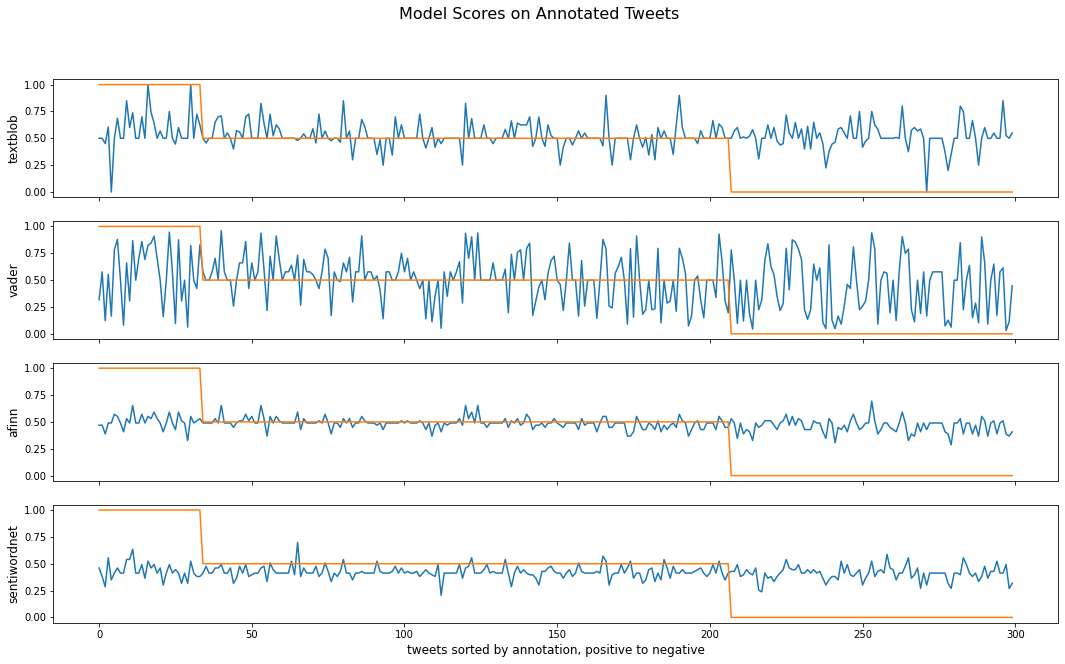

In [276]:
sorted_annot_df = annot_df.sort_values(by='our_nums', ascending=False)
x = range(sorted_annot_df.shape[0])

plt.figure(figsize=(12,6))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True, figsize=(18,10))

fig.suptitle('Model Scores on Annotated Tweets', fontsize=16)

ax1.plot(x, sorted_annot_df[['normalized_textblob_Polarity', 'our_nums']].sort_values(by='our_nums', 
                                                        ascending=False),
           )
ax1.set_ylabel('textblob', fontsize=12)
ax2.plot(x, sorted_annot_df[['normalized_vader_Polarity', 'our_nums']].sort_values(by='our_nums', 
                                                        ascending=False))
ax2.set_ylabel('vader', fontsize=12)
ax3.plot(x, sorted_annot_df[['normalized_AFINN_scores', 'our_nums']].sort_values(by='our_nums', 
                                                        ascending=False))
ax3.set_ylabel('afinn', fontsize=12)
ax4.plot(x, sorted_annot_df[['normalized_SentiWordNet_scores', 'our_nums']].sort_values(by='our_nums', 
                                                        ascending=False))
ax4.set_ylabel('sentiwordnet', fontsize=12)
ax4.set_xlabel('tweets sorted by annotation, positive to negative', fontsize=12)

plt.show()


<Figure size 864x432 with 0 Axes>

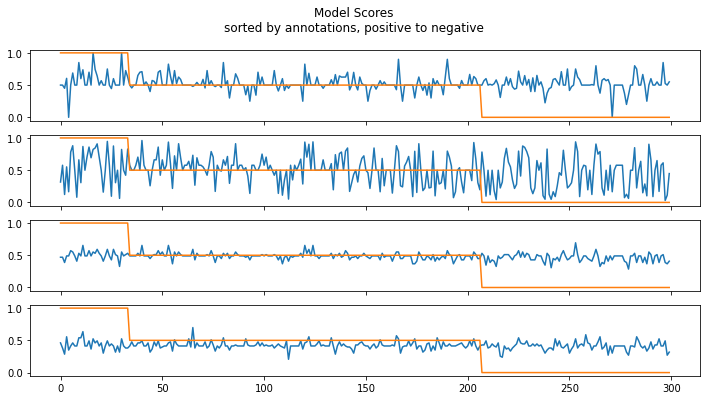

In [266]:
# print(all_scores) # ['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores']

sorted_annot_df = annot_df.sort_values(by='our_nums', ascending=False)
x = range(sorted_annot_df.shape[0])

plt.figure(figsize=(12,6))
fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(12,6))

fig.suptitle('Model Scores\nsorted by annotations, positive to negative')

axs[0].plot(x, sorted_annot_df[['normalized_textblob_Polarity', 'our_nums']].sort_values(by='our_nums', 
                                                        ascending=False),
           )
axs[1].set
axs[1].plot(x, sorted_annot_df[['normalized_vader_Polarity', 'our_nums']].sort_values(by='our_nums', 
                                                        ascending=False))
axs[2].plot(x, sorted_annot_df[['normalized_AFINN_scores', 'our_nums']].sort_values(by='our_nums', 
                                                        ascending=False))
axs[3].plot(x, sorted_annot_df[['normalized_SentiWordNet_scores', 'our_nums']].sort_values(by='our_nums', 
                                                        ascending=False))

plt.show()


['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores']


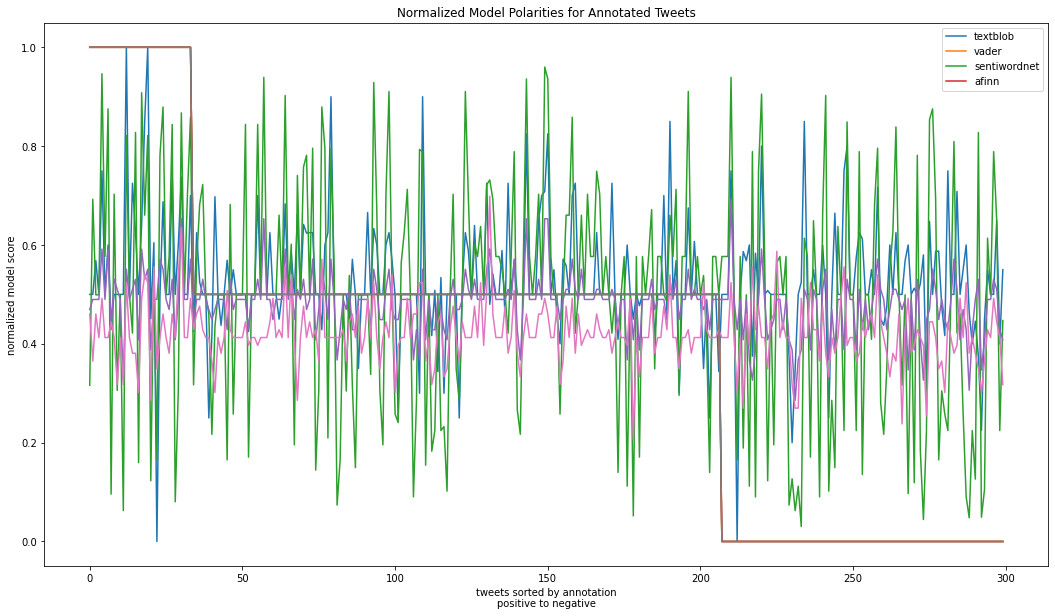

In [242]:
print(all_scores)
all_scores_and_our_nums = ['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores', 'our_nums']

x = range(annot_df.shape[0])
plt.figure(figsize=(18,10))
for val in all_scores:
    plt.plot(x, annot_df[[val, 'our_nums']].sort_values(ascending=False, by='our_nums'))
    
#plt.plot(x, annot_df['our_nums'].sort_values(ascending=False))
#plt.gca().legend()
plt.gca().legend(('textblob','vader','sentiwordnet', 'afinn'))
plt.xlabel('tweets sorted by annotation\npositive to negative')
plt.ylabel('normalized model score')
plt.title('Normalized Model Polarities for Annotated Tweets')
#plt.colormaps('Spectral')
plt.show()
    
# plt.figure(figsize=(18,10))
# plt.plot(x, textblob)
# plt.plot(x, vader)
# plt.plot(x, sentiwordnet)
# plt.plot(x, afinn)

# plt.gca().legend(('textblob','vader','sentiwordnet', 'afinn'))
# plt.xlabel('tweets sorted by descending normalized AFINN scores')
# plt.ylabel('normalized model score')
# plt.title('Normalized Model Polarities')
# plt.show()

    
#plot_df = annot_df[all_scores_and_our_nums].sort_values(by='our_nums', ascending=False)
#plot_df.plot(layout=(2,2), figsize=(20,12))
#plt.show()


## Look at trends and outliers

I am noticing something on textblob that I think is interesting.  I think there may be some liberal bias in the model.  Let me paste some output...

 

I looked at the FPs and FNs for textblob, where we annotate positive and it predicts negative, or vice versa.  Then if it's a FP, I see if it has some popular "liberal" words like obama, biden, ukraine, statehood.  Or if it's FN, I see if it mentions russia, maga, trump, or nazi.  Then I count the frequency of how often this occurs.

In [283]:
print(all_scores_and_annot)
print(df.columns)
cols = ['text', 'normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores', 'our_label']
df.loc[~df['our_label'].isna()]
df.loc[df['our_label'] == 'positive'][cols]


['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores', 'our_label']
Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'created_at',
       'clean_text', 'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_lab

,text,normalized_textblob_Polarity,normalized_vader_Polarity,normalized_AFINN_scores,normalized_SentiWordNet_scores,our_label
359,RT @NetflixIsAJoke: Shout out to @ohsnapjbsmoo...,0.500000,0.702710,0.489796,0.412698,positive
638,RT @TheWantonWench: When you say “I need a bre...,0.700000,0.858546,0.571429,0.492063,positive
5031,RT @sagesurge: Marlon Wayans roasting Chris Ro...,0.500000,0.576703,0.489796,0.412698,positive
5845,RT @mark_k: BREAKING: .@Microsoft CTO announce...,0.500000,0.499164,0.489796,0.412698,positive
5893,@gogamza @papers_daily Saved! Here's the compi...,0.624286,0.827653,0.530612,0.380952,positive
6204,RT @AiHandbook: ChatGPT can triple productivit...,1.000000,0.821727,0.551020,0.523810,positive
6559,@yamayama0987654 @MakadiaHarsh ...create uniqu...,0.687500,0.879311,0.551020,0.460317,positive
6599,@ParrotlyFinance Here's where I see a good sou...,0.604545,0.551178,0.489796,0.555556,positive
6641,RT @AIApe_Coin: $AIAPE Presale Announcement 📣\...,0.850000,0.660319,0.530612,0.539683,positive
6727,RT @ihteshamit: Most people struggle with impl...,0.500000,0.159585,0.408163,0.301587,positive


### False Positives and False Negatives

In [299]:
print("Positive Annotation, Negative Textblob:\n")
tb_wrong = df.loc[(df['our_label'] == 'positive') & (df['normalized_textblob_Polarity'] < 0.5)]['text'].index

for idx in tb_wrong:
    print(df.iloc[idx]['text'], f"({df.iloc[idx]['normalized_textblob_Polarity']})", '\n')


Positive Annotation, Negative Textblob:

RT @Robin_Hoodsband: Russia is on the road to victory against evil NATO and the Nazi's https://t.co/OiFtdg5U6F (0.0) 

RT @NonaMamulashvi: No matter how hard Russia tries to destroy our future, Georgia’s future is European and we will keep fighting for it! #… (0.4508333333333333) 

@GMB @susannareid100 @SuellaBraverman Contrary to popular opinion, you don't have to give up your nation, you statehood and become a dumping ground for an endless stream of people who will hate and detest you until you emigrate or die out (0.4458333333333333) 



In [300]:
print("\nNegative Annotation, Positive Textblob:\n")
tb_wrong = df.loc[(df['our_label'] == 'negative') & (df['normalized_textblob_Polarity'] > 0.5)]['text'].index
for idx in tb_wrong:
    print(df.iloc[idx]['text'], f"({df.iloc[idx]['normalized_textblob_Polarity']})", '\n')
    


Negative Annotation, Positive Textblob:

RT @NaomiSky_15: #MeghanMarkle must be really worried about what #ChrisRockLive said about her racism claims because someone reported that… (0.6) 

"They know training and policy are not the problems; it is the CULTURE. All officers involved acted the same way, in allegiance to each other, rather than allegiance to the community, their training, or the law." @Rashad_Richey 
Memphis to release New #TyreNichols arrest footage. https://t.co/Bls0cNvMqJ (0.5215909090909091) 

- Fired from ATL PD for mishandled investigations
- Oversaw the task force that beat #TyreNichols to death
- 2023 YTD: We have approx 3k stolen cars in Memphis
- Crime is sky high; Ppl don't trust her or the MPD

#CerelynDavis
#InternationalWomensDay #WomensDay #8MarchWomensDay https://t.co/LvfaUfUU9C (0.58) 

RT @DeeTwoCents: Another American Tragedy. Full video is on @tiktok_us #TyreNichols #WokeAF https://t.co/x4I11JG6YD (0.5875) 

RT @ranimolla: It's time for cover letters 

In [316]:
lib_concepts = ['ukraine','obama','biden','statehood']
cons_concepts = ['russia','maga','trump','nazi']

def bias_check(text, score):
    liberal_content = False
    conservative_content = False
    if any(substring in text.lower() for substring in lib_concepts):
        liberal_content = True
    if any(substring in text.lower() for substring in cons_concepts):
        conservative_content = True
    return liberal_content, conservative_content, score
    
tb_wrong = df.loc[((df['our_label'] == 'negative') & (df['normalized_textblob_Polarity'] > 0.5)) | 
                  ((df['our_label'] == 'positive') & (df['normalized_textblob_Polarity'] < 0.5))
                 ]['text'].index

model_bias = []
bias = 0

for idx in tb_wrong:
    # test the things that it got wrong compared to the annotation
    bias_result = bias_check(df.iloc[idx]['text'], df.iloc[idx]['normalized_textblob_Polarity'])
    model_bias.append(bias_result)
    
for x in model_bias:
    # x is like (liberal terms, conservative terms, score)
    # liberal expressions and false positive model polarity
    if (x[2] > 0.5) and x[0] == True and x[1] == False:
        bias += 1
    elif (x[2] > 0.5) and x[0] == True:
        bias += .5
    else:
        bias -= 1
    # conservative expressions and false negative model polarity
    if (x[2] < 0.5) and x[0] == False and x[1] == True:
        bias += 1
    elif (x[2] < 0.5) and x[1] == True:
        bias += .5
    else:
        bias -= 1

if bias > 0:
    print('Maybe biased:', (bias > 0), '; biased more than 50% of the time.')
else:
    print('Maybe biased:', (bias > 0), '; biased less than 50% of the time.')

Maybe biased: False ; biased less than 50% of the time.


In [324]:

def bias_check(text, score):
    liberal_content = False
    conservative_content = False
    if any(substring in text.lower() for substring in lib_concepts):
        liberal_content = True
    if any(substring in text.lower() for substring in cons_concepts):
        conservative_content = True
    return liberal_content, conservative_content, score

lib_concepts = ['ukraine','obama','biden','statehood']
cons_concepts = ['russia','maga','trump','nazi']

model_score_cols = ['normalized_textblob_Polarity', 'normalized_vader_Polarity', 'normalized_AFINN_scores', 'normalized_SentiWordNet_scores']
models = [x.split('_')[1] for x in model_score_cols]


for model_idx, col in enumerate(model_score_cols):
    # Gather FPs and FNs indices
    tb_wrong = df.loc[((df['our_label'] == 'negative') & (df[col] > 0.5)) | 
                  ((df['our_label'] == 'positive') & (df[col] < 0.5))
                 ]['text'].index

    model_bias = []
    bias = 0

    # Gather the bias_check metrics
    for idx in tb_wrong:
        # test the things that it got wrong compared to the annotation
        bias_result = bias_check(df.iloc[idx]['text'], df.iloc[idx]['normalized_textblob_Polarity'])
        model_bias.append(bias_result)
        
    # calculate if more than half indicate some bias
    for x in model_bias:
        # x looks like (liberal terms, conservative terms, score)
        # liberal expressions and false positive model polarity
        if (x[2] > 0.5) and x[0] == True:
            bias += 1
        # conservative expressions and false negative model polarity
        if (x[2] < 0.5) and x[1] == True:
            bias += 1

    print(f'\nReport for {models[model_idx]}:')
    if bias > 0:
        print('Maybe biased:', (bias*2 > len(model_bias)), f'; biased more than 50% of the time. ({bias}/{len(model_bias)})')
    else:
        print('Maybe biased:', (bias*2 > len(model_bias)), f'; biased less than 50% of the time. ({bias}/{len(model_bias)})')
        
        


Report for textblob:
Maybe biased: True ; biased more than 50% of the time. (28/39)

Report for vader:
Maybe biased: False ; biased more than 50% of the time. (16/50)

Report for AFINN:
Maybe biased: False ; biased more than 50% of the time. (14/40)

Report for SentiWordNet:
Maybe biased: False ; biased more than 50% of the time. (6/35)


In [334]:
# df.to_csv('../../data/normalized_annotatted_all_2023-04-07_13.21.00.0000.tsv', sep='\t')

In [326]:
# where is our keyword?  pick it back up in part 3 (Multiple Model Evaluation 3)
df.columns


Index(['Unnamed: 0', 'conversation_id', 'lang', 'reply_settings', 'created_at',
       'clean_text', 'text', 'author_id', 'referenced_tweets', 'id',
       'edit_history_tweet_ids', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'geo.coordinates.type', 'geo.coordinates.coordinates',
       'textblob_Polarity', 'textblob_Subjectivity', 'vader_Polarity',
       'vader_Subjectivity', 'AFINN_scores', 'AFINN_sentiments',
       'SentiWordNet_scores', 'normalized_textblob_Polarity',
       'normalized_textblob_Subjectivity', 'normalized_vader_Polarity',
       'normalized_vader_Subjectivity', 'normalized_AFINN_scores',
       'normalized_SentiWordNet_scores', 'our_label', 'annotator'],
      dtype='object')

In [333]:
# %%sh
# ls ../../data
# keys_df = pd.read_json('../../data/project_data.2023-03-11_13.11.55.783862.json')
# print(keys_df.columns)
# keys_df.head()

Index(['conversation_id', 'lang', 'reply_settings', 'created_at', 'text',
       'author_id', 'referenced_tweets', 'id', 'edit_history_tweet_ids',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'public_metrics.impression_count', 'in_reply_to_user_id',
       'geo.place_id', 'withheld.copyright', 'withheld.country_codes',
       'keyword', 'geo.coordinates.type', 'geo.coordinates.coordinates'],
      dtype='object')


,conversation_id,lang,reply_settings,created_at,text,author_id,referenced_tweets,id,edit_history_tweet_ids,public_metrics.retweet_count,...,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,in_reply_to_user_id,geo.place_id,withheld.copyright,withheld.country_codes,keyword,geo.coordinates.type,geo.coordinates.coordinates
0,1633954063934009344,en,everyone,2023-03-09 22:13:00,RT @Infantry_bucky: He’s lucky a #ChrisRockLiv...,1519164980582653952,"[{'type': 'retweeted', 'id': '1633938373529292...",1633954063934009344,[1633954063934009354],8,...,0,0,0,NaN,None,NaN,None,#chrisrocklive,None,None
1,1633954058212876288,en,everyone,2023-03-09 22:12:59,RT @1_ofakindnocap: Chris Rock: “we all been c...,21575184,"[{'type': 'retweeted', 'id': '1632283297588948...",1633954058212876288,[1633954058212876289],616,...,0,0,0,NaN,None,NaN,None,#chrisrocklive,None,None
2,1633951267423768576,en,everyone,2023-03-09 22:01:54,RT @1_ofakindnocap: Chris Rock: “we all been c...,360633018,"[{'type': 'retweeted', 'id': '1632283297588948...",1633951267423768576,[1633951267423768578],616,...,0,0,0,NaN,None,NaN,None,#chrisrocklive,None,None
3,1633950853626318848,en,everyone,2023-03-09 22:00:15,RT @rolandsmartin: Working out and watching th...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632825595473149...",1633950853626318848,[1633950853626318850],14,...,0,0,0,NaN,None,NaN,None,#chrisrocklive,None,None
4,1633950824664645632,en,everyone,2023-03-09 22:00:08,RT @rolandsmartin: Workout done. I’ll have a f...,1547101103803830272,"[{'type': 'retweeted', 'id': '1632833853021728...",1633950824664645632,[1633950824664645634],8,...,0,0,0,NaN,None,NaN,None,#chrisrocklive,None,None
